# Quantization


Image Source: https://en.wikipedia.org/wiki/Sherlock_Holmes_%281939_film_series%29#/media/File:Sherlock_Holmes_and_the_Secret_Weapon_2.jpg

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

n_colors = 2

In [2]:
# Load image
image_raw = io.imread("sherlock.jpg")
image = np.array(image_raw, dtype=np.float64) / 255
h, w, d = image.shape
image_array = np.reshape(image, (h * w, d))

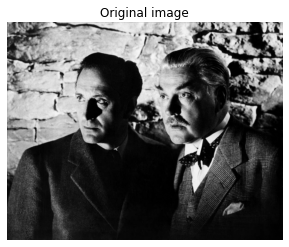

In [3]:
# Original image
plt.figure()
plt.clf
plt.axis('off')
plt.title('Original image')
plt.imshow(image)

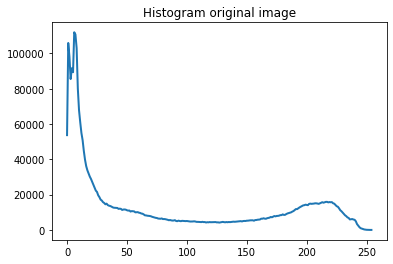

In [5]:
# Histogram original image
plt.figure()
plt.clf()
plt.title('Histogram original image')
hist = np.histogram(image_raw, bins=np.arange(0,256))
plt.plot(hist[1][:-1], hist[0], lw=2)

In [6]:
# Train kmeans based on a sample for n colors and predict
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors).fit(image_array_sample)
labels = kmeans.predict(image_array)

In [7]:
# Create the quantized image
image_out = np.zeros((h,w,d))
label_idx = 0
for i in range(h):
  for j in range(w):
    image_out[i][j] = kmeans.cluster_centers_[labels[label_idx]]
    label_idx +=1

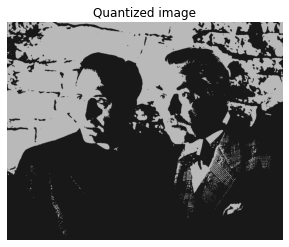

In [8]:
# Quantized image
plt.figure()
plt.clf()
plt.axis('off')
plt.title('Quantized image')
plt.imshow(image_out)

In [9]:
# Convert quantized image for plotting
image_out = np.array(image_out*255, dtype=np.uint8)

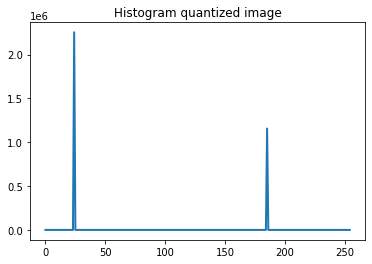

In [10]:
# Histogram quantized image
plt.figure()
plt.clf()
plt.title('Histogram quantized image')
hist = np.histogram(image_out, bins=np.arange(0,256))
plt.plot(hist[1][:-1], hist[0], lw=2)